In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.axes as ax

In [109]:
# Lodaing data


data = pd.read_csv('data_for_lr.csv')
print(data.head())
print(data.info())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None


In [110]:
# Handling Null Values

data = data.dropna()
print(f"Shape of data is {data.shape}")


Shape of data is (699, 2)


In [111]:
# Splitting training and Testing

# Training dataset
train_input = np.array(data.x[:500]).reshape(500,1)
train_output = np.array(data.y[:500]).reshape(500,1)

# Testing dataset
test_input = np.array(data.x[500:]).reshape(-1,1)
test_output = np.array(data.y[500:]).reshape(-1,1)

print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))


Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


In [112]:
# Forward Propagation

def forward_propagation(train_input , parameters):
    pred = np.multiply(train_input,parameters['m']) + parameters['c']
    return pred

In [113]:
# Cost Function

def cost( prediction, train_output):
    cst = np.mean((prediction - train_output)**2) * 0.5
    return cst


In [114]:
#Gradienct descent Propagation

def grad_prop(prediction , train_output , train_input):
    derivatives = dict()
    df = (prediction - train_output)
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives


In [115]:
#Weight Regularization

def regulirazation(parameters , learning_rate , derivatives):
    parameters['m'] = parameters['m'] - learning_rate*derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate*derivatives['dc']
    return parameters

In [116]:
#Training the model

def training(train_input , train_output , learning_rate , iters):
    
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    plt.figure()
    
    loss = []
    
    for i in range(iters):
        pred = forward_propagation(train_input , parameters)
        cst = cost(pred , train_output)
        loss.append(cst)
        
        print(f"Itereation is {i}  Loss is {loss[i]}")
        
        fig , ax = plt.subplots()
        
        ax.plot(train_input , train_output , '+',label="Original")
        ax.plot(train_input , pred , '*' , label="Prediction")
        
        legend = ax.legend()
        
        plt.plot(train_input , train_output , '+')
        plt.plot(train_input , pred , '*' )
        
        plt.show()
        
        derivatives = grad_prop(pred , train_output,train_input)
        
        parameters = regulirazation(parameters , learning_rate, derivatives)
        
    return parameters , loss
        

Itereation is 0  Loss is 617.9026257878237


<Figure size 432x288 with 0 Axes>

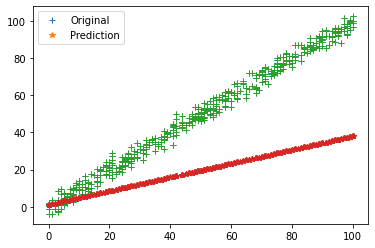

Itereation is 1  Loss is 282.58587048401625


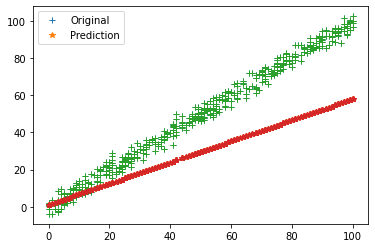

Itereation is 2  Loss is 130.4522818252856


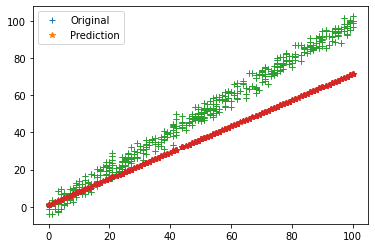

Itereation is 3  Loss is 61.429098774922025


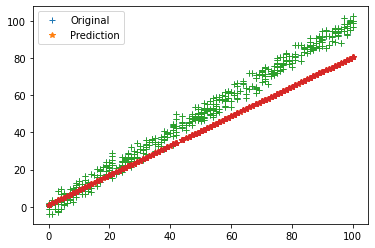

Itereation is 4  Loss is 30.113198805855315


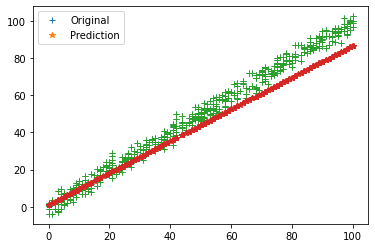

Itereation is 5  Loss is 15.905134937184213


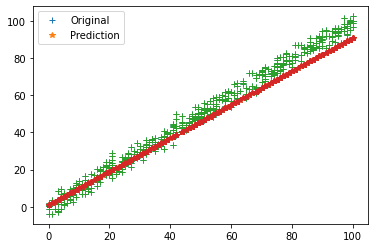

Itereation is 6  Loss is 9.458915256877205


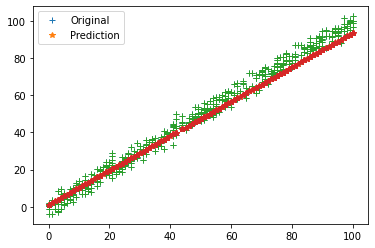

Itereation is 7  Loss is 6.534252882439779


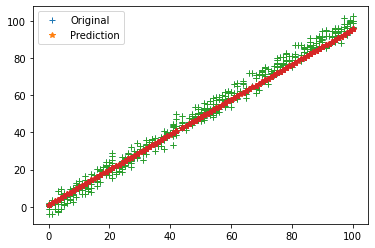

Itereation is 8  Loss is 5.207324958567686


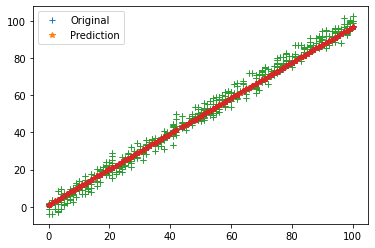

Itereation is 9  Loss is 4.605290924903864


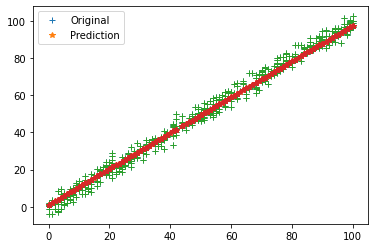

Itereation is 10  Loss is 4.3321420524201315


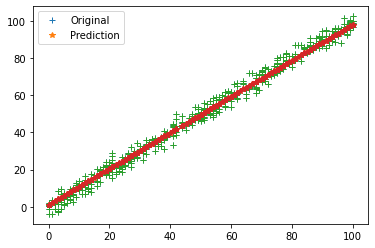

Itereation is 11  Loss is 4.208208742120785


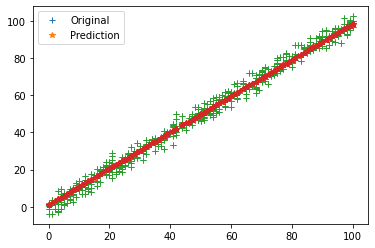

Itereation is 12  Loss is 4.151974697932031


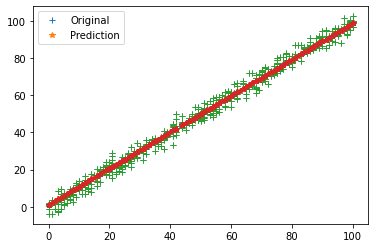

Itereation is 13  Loss is 4.12645588603435


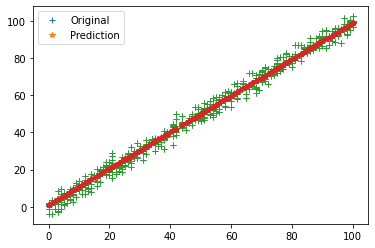

Itereation is 14  Loss is 4.114872609318775


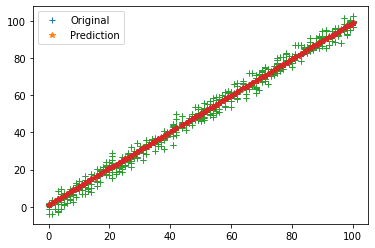

Itereation is 15  Loss is 4.109611900621074


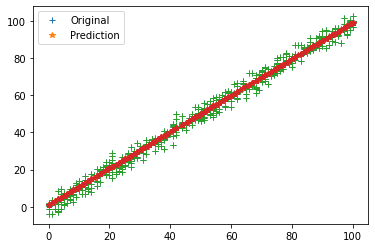

Itereation is 16  Loss is 4.107219748306378


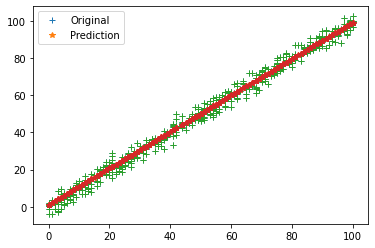

Itereation is 17  Loss is 4.106129063470138


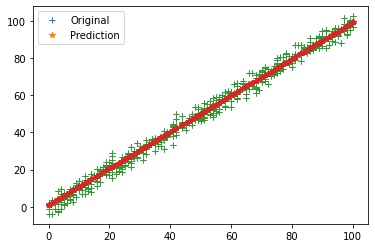

Itereation is 18  Loss is 4.105628856140567


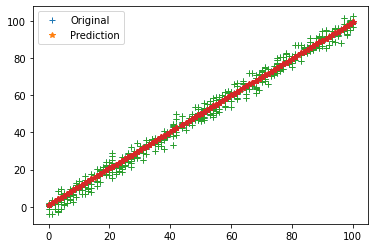

Itereation is 19  Loss is 4.105396549379928


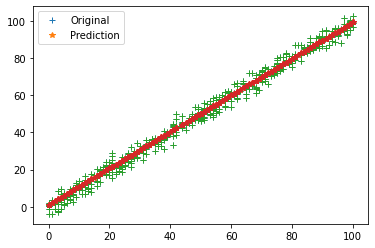

In [117]:
parameters , loss = training(train_input , train_output , 0.0001, 20)

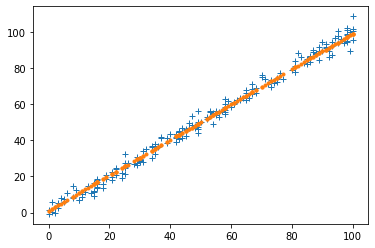

In [120]:
# Prediction

test_prediction = np.multiply(test_input , parameters['m']) + parameters['c']

plt.figure()
plt.plot(test_input , test_output , '+',label = "Original Test Result")
plt.plot(test_input , test_prediction , '.', label = "Training Test Result")
plt.show()